<a href="https://colab.research.google.com/github/BiancaHill/Data-Science/blob/main/BianHillU9Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 9 Project: Your first neural network

**Task**:

Two parts:

1. Get a data set approved by your instructor (me). It must have either: three or more variables OR a sufficiently complicated relationship between two of the variables.

2. Create, analyze, and present a multi-layer non-linear neural network using the python programming language. Remember that visualizing your model is part of analyzing it.


I picked the first data set because wow deaths from natural disastors, that's cool. But it didn't work :(. The second data set I picked because I couldn't find another one and I knew this one had trends I could use since I'd used it in the last unit. I'm predicting total energy from various energy factors in residential areas of the US.

Basic library imports

In [1]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

My first attempt seemed to be going great, but unfortunetly there wasn't enough of a trend for the neural network to pick anything up. I think it's because of how spread apart the data was. Because it was organized by disaster and year, there were very few years in which there was some deaths from all natural disastors. I had to do a lot of data manipulation to get rid of all the blank values. The code for it can be found below.

# Attempt #1

## Set up

In [2]:
NatD = pd.read_csv("https://raw.githubusercontent.com/BiancaHill/Data-Science/refs/heads/main/w%20total.csv").dropna()
NatD

,Entity,Year,Drought,Flood,Earthquake,Extreme weather,Extreme temperature,Volcanic activity,Wildfire,Wet mass movement,Total
65,World,1965,502000.0,1401.0,695.0,59932.0,100.0,355.0,0.0,230.0,564713
66,World,1966,508000.0,1923.0,2789.0,2327.0,262.0,1088.0,25.0,604.0,517018
68,World,1968,199.0,7306.0,11571.0,1669.0,153.0,90.0,12.0,1196.0,22196
73,World,1973,1669.0,1829.0,591.0,4344.0,283.0,0.0,0.0,3541.0,12257
77,World,1977,19655.0,2568.0,3098.0,15298.0,0.0,215.0,3.0,40.0,40877
78,World,1978,19774.0,5897.0,25162.0,3676.0,150.0,0.0,2.0,86.0,54747
79,World,1979,18.0,1038.0,2074.0,2623.0,470.0,268.0,0.0,338.0,6829
80,World,1980,0.0,10466.0,7639.0,1379.0,1389.0,90.0,0.0,300.0,21263
81,World,1981,20109.0,5283.0,3979.0,3790.0,300.0,192.0,8.0,421.0,34082
82,World,1982,20988.0,4409.0,2183.0,2782.0,400.0,130.0,2.0,653.0,31547


In [3]:
NatD.drop(columns=["Entity","Year"],inplace=True)
NatD.reset_index(drop=True,inplace=True)
NatD

,Drought,Flood,Earthquake,Extreme weather,Extreme temperature,Volcanic activity,Wildfire,Wet mass movement,Total
0,502000.0,1401.0,695.0,59932.0,100.0,355.0,0.0,230.0,564713
1,508000.0,1923.0,2789.0,2327.0,262.0,1088.0,25.0,604.0,517018
2,199.0,7306.0,11571.0,1669.0,153.0,90.0,12.0,1196.0,22196
3,1669.0,1829.0,591.0,4344.0,283.0,0.0,0.0,3541.0,12257
4,19655.0,2568.0,3098.0,15298.0,0.0,215.0,3.0,40.0,40877
5,19774.0,5897.0,25162.0,3676.0,150.0,0.0,2.0,86.0,54747
6,18.0,1038.0,2074.0,2623.0,470.0,268.0,0.0,338.0,6829
7,0.0,10466.0,7639.0,1379.0,1389.0,90.0,0.0,300.0,21263
8,20109.0,5283.0,3979.0,3790.0,300.0,192.0,8.0,421.0,34082
9,20988.0,4409.0,2183.0,2782.0,400.0,130.0,2.0,653.0,31547


The pairplot shows pretty much no trends in the data :(. I didn't do the pairplot until the end, so I didn't know I couldn't use this data.

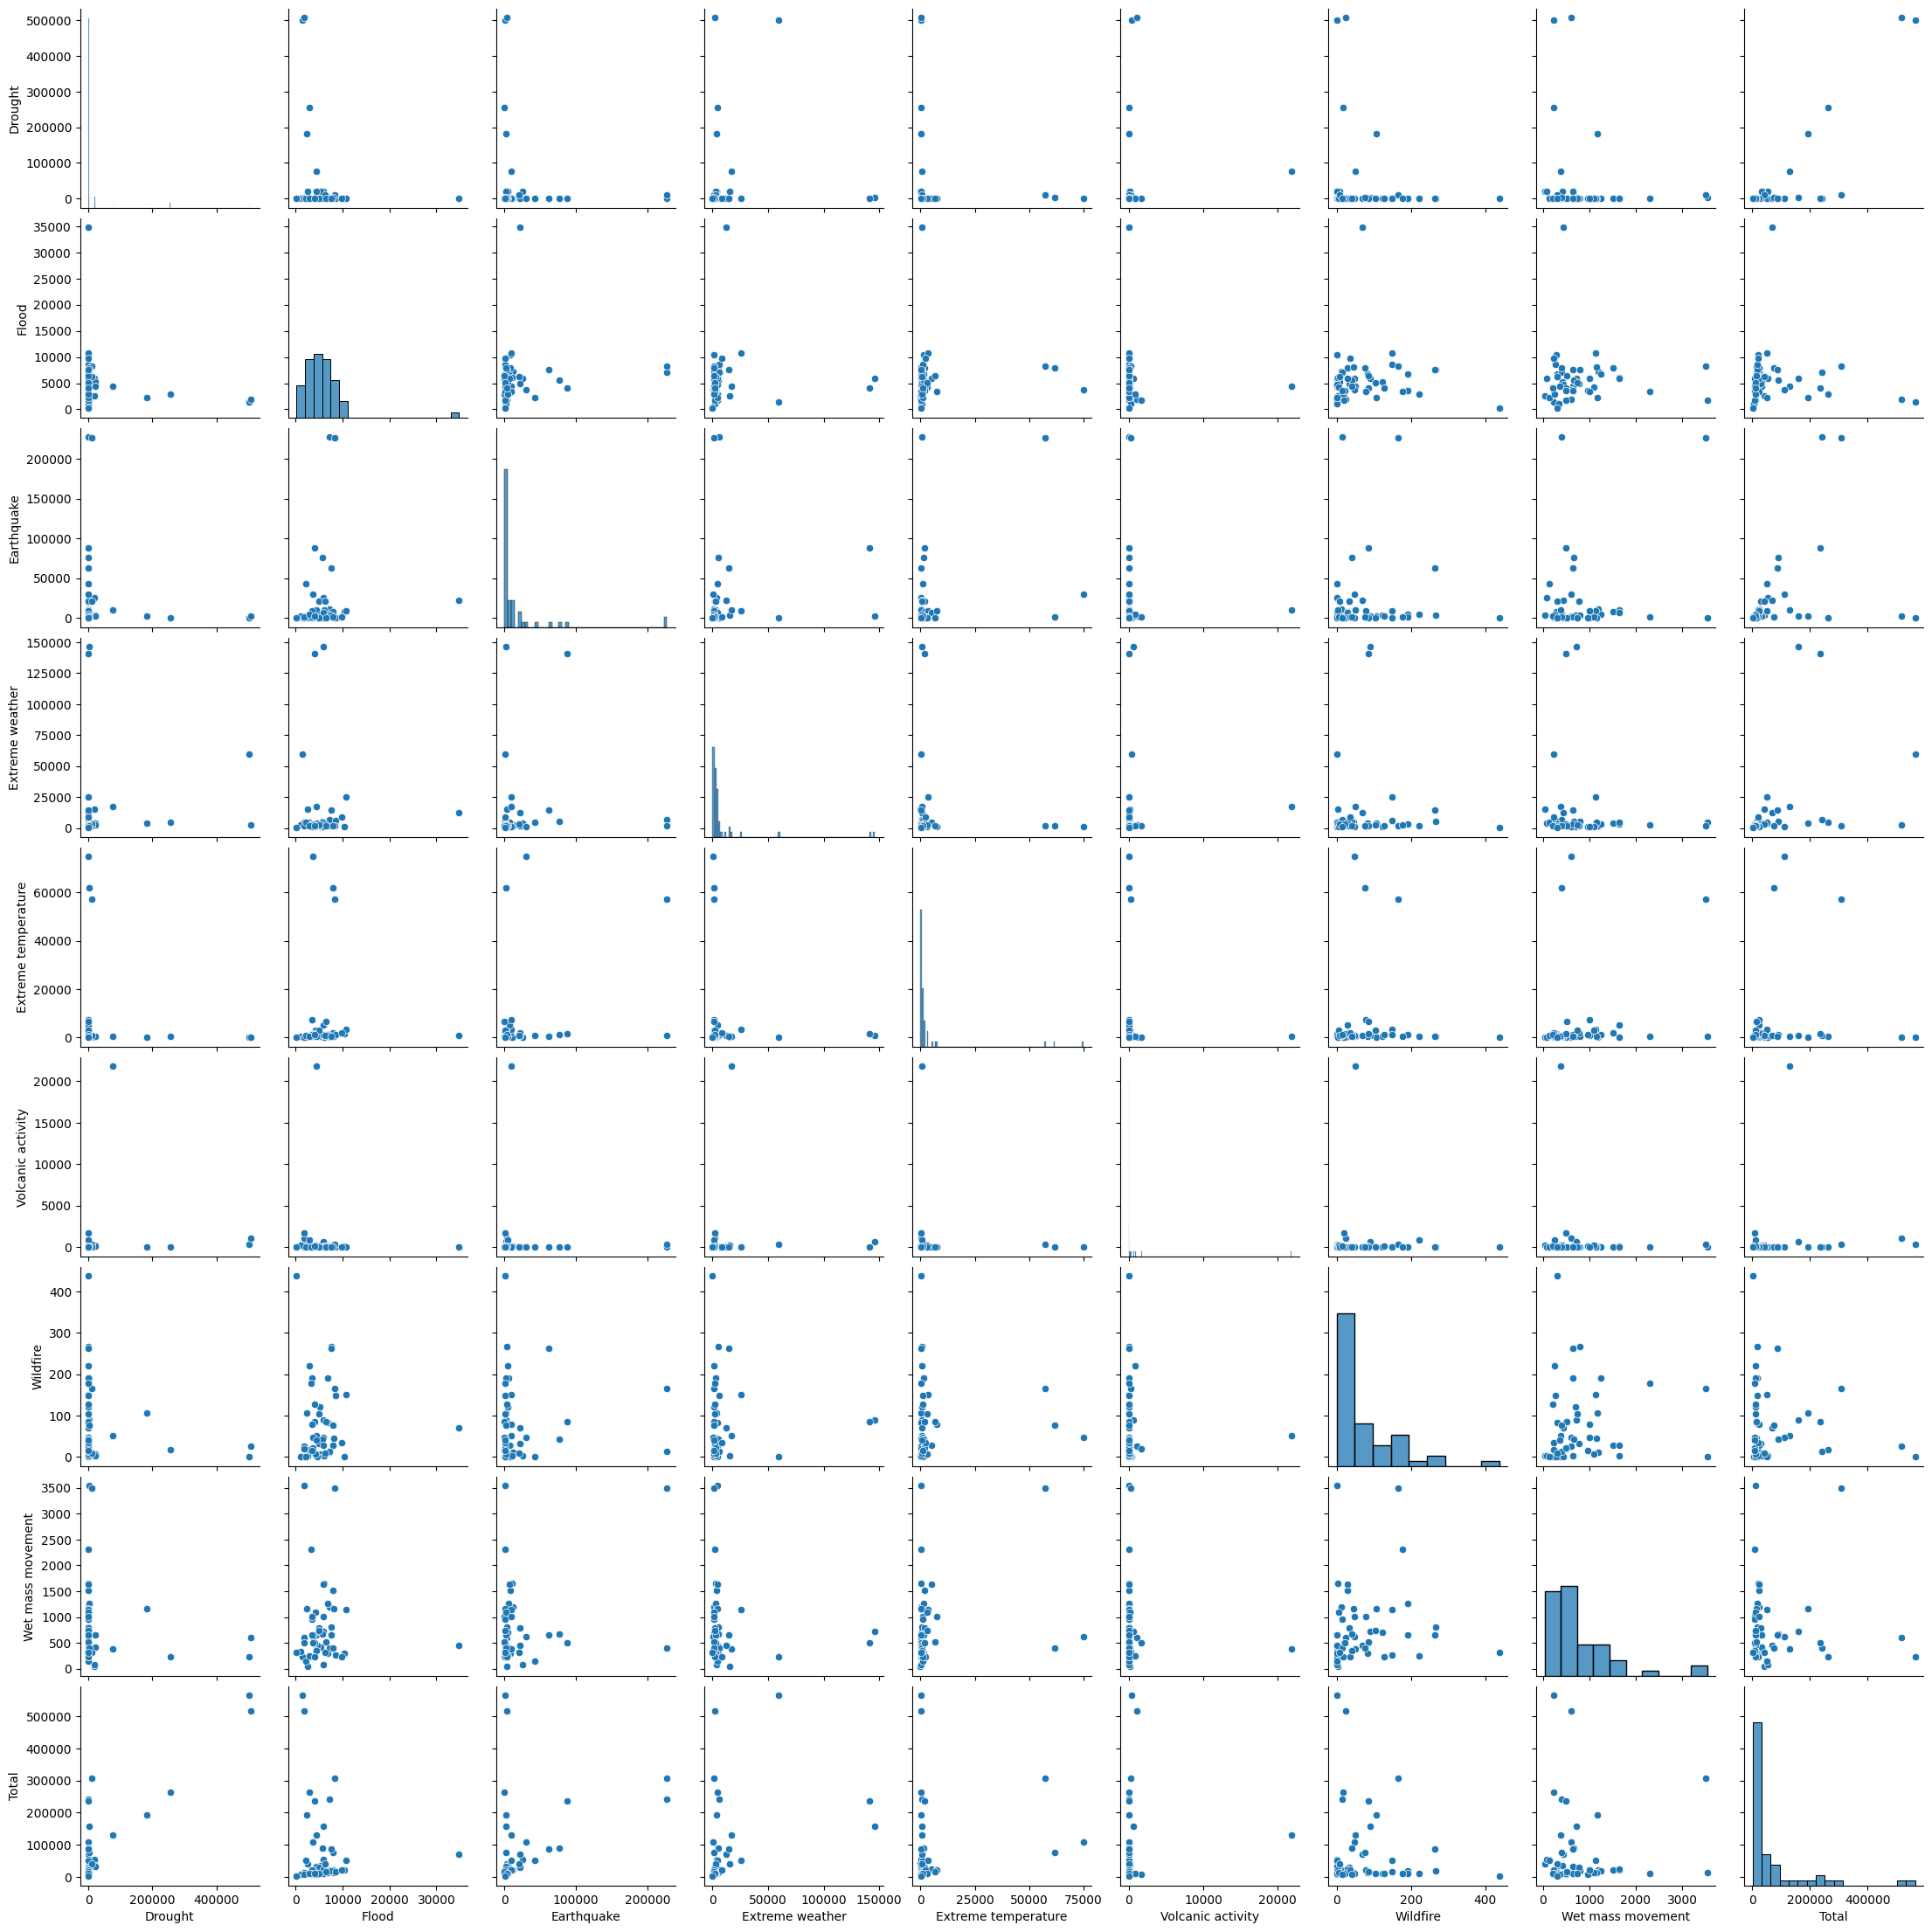

In [4]:
sns.pairplot(NatD)

Scaling the data

In [5]:
df = pd.DataFrame(NatD)
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_values, columns=df.columns)
df_scaled

,Drought,Flood,Earthquake,Extreme weather,Extreme temperature,Volcanic activity,Wildfire,Wet mass movement,Total
0,4.470559,-0.901511,-0.399355,1.730071,-0.319751,-0.068916,-0.849207,-0.771580,4.122462
1,4.527636,-0.792307,-0.353763,-0.308796,-0.309023,0.173808,-0.564126,-0.249400,3.721619
2,-0.302969,0.333830,-0.162556,-0.332085,-0.316241,-0.156667,-0.712368,0.577152,-0.437016
3,-0.288985,-0.811972,-0.401620,-0.237406,-0.307632,-0.186469,-0.849207,3.851246,-0.520547
4,-0.117888,-0.657371,-0.347036,0.150299,-0.326373,-0.115275,-0.814997,-1.036858,-0.280016
5,-0.116756,0.039063,0.133357,-0.261050,-0.316440,-0.186469,-0.826400,-0.972633,-0.163448
6,-0.304690,-0.977451,-0.369331,-0.298319,-0.295249,-0.097724,-0.849207,-0.620790,-0.566165
7,-0.304862,0.994909,-0.248166,-0.342349,-0.234391,-0.156667,-0.849207,-0.673846,-0.444858
8,-0.113569,-0.089387,-0.327854,-0.257015,-0.306506,-0.122891,-0.757981,-0.504905,-0.337123
9,-0.105207,-0.272230,-0.366958,-0.292692,-0.299884,-0.143421,-0.826400,-0.180986,-0.358428


Because I'm using multiple variables to predict total energy, I had to split them because when defining my X and Y variables, I can't just tell the model not to use certain columns, so instead I defined new dataframes as only certain columns of the original data.

In [6]:
X_scaled = df_scaled[["Drought","Flood","Earthquake","Extreme weather","Extreme temperature","Volcanic activity","Wildfire","Wet mass movement"]]

In [7]:
Y_scaled = df_scaled[["Total"]]

In [8]:
#convert to numpy array
ND_matrix = Y_scaled.to_numpy()
#convert to a PyTorch tensor
ND_tensor = torch.from_numpy(ND_matrix)

Forcing the tensor to be a float.64 dtype because it was becoming a different dtype when I put it in the model

In [9]:
ND_double=ND_tensor.double()
ND_double

tensor([[ 4.1225],
        [ 3.7216],
        [-0.4370],
        [-0.5205],
        [-0.2800],
        [-0.1634],
        [-0.5662],
        [-0.4449],
        [-0.3371],
        [-0.3584],
        [ 0.9918],
        [ 1.5915],
        [ 0.4641],
        [-0.5622],
        [-0.4655],
        [-0.5333],
        [-0.1959],
        [ 0.7119],
        [-0.5231],
        [-0.4465],
        [-0.5136],
        [-0.4330],
        [-0.4996],
        [-0.4661],
        [-0.2003],
        [-0.0331],
        [-0.5419],
        [-0.3627],
        [-0.5219],
        [ 0.3002],
        [ 1.4115],
        [ 0.1262],
        [-0.4231],
        [-0.4820],
        [ 1.3535],
        [-0.5330],
        [ 1.9627],
        [-0.2763],
        [-0.5429],
        [-0.4403],
        [-0.5565],
        [-0.4314],
        [-0.5530],
        [-0.5416],
        [-0.5257],
        [-0.5234],
        [-0.4922],
        [-0.5372],
        [ 0.0159],
        [ 0.1021],
        [-0.6108]], dtype=torch.float64)

In [10]:
#convert to numpy array
N10_matrix = X_scaled.to_numpy()
#convert to a PyTorch tensor
N10_tensor = torch.from_numpy(N10_matrix)

Forcing the tensor to be a float.64 dtype because it was becoming a different dtype when I put it in the model

In [11]:
N10_double=N10_tensor.double()
N10_double

tensor([[ 4.4706e+00, -9.0151e-01, -3.9936e-01,  1.7301e+00, -3.1975e-01,
         -6.8916e-02, -8.4921e-01, -7.7158e-01],
        [ 4.5276e+00, -7.9231e-01, -3.5376e-01, -3.0880e-01, -3.0902e-01,
          1.7381e-01, -5.6413e-01, -2.4940e-01],
        [-3.0297e-01,  3.3383e-01, -1.6256e-01, -3.3209e-01, -3.1624e-01,
         -1.5667e-01, -7.1237e-01,  5.7715e-01],
        [-2.8898e-01, -8.1197e-01, -4.0162e-01, -2.3741e-01, -3.0763e-01,
         -1.8647e-01, -8.4921e-01,  3.8512e+00],
        [-1.1789e-01, -6.5737e-01, -3.4704e-01,  1.5030e-01, -3.2637e-01,
         -1.1527e-01, -8.1500e-01, -1.0369e+00],
        [-1.1676e-01,  3.9063e-02,  1.3336e-01, -2.6105e-01, -3.1644e-01,
         -1.8647e-01, -8.2640e-01, -9.7263e-01],
        [-3.0469e-01, -9.7745e-01, -3.6933e-01, -2.9832e-01, -2.9525e-01,
         -9.7724e-02, -8.4921e-01, -6.2079e-01],
        [-3.0486e-01,  9.9491e-01, -2.4817e-01, -3.4235e-01, -2.3439e-01,
         -1.5667e-01, -8.4921e-01, -6.7385e-01],
        [-1.1357

## Model

Defining my X and y variables

In [12]:
X = N10_double[:]#.unsqueeze(dim=1) #use all columns as predictor
y = ND_double[:]#.unsqueeze(dim=1) #FG% is the estimand, the thing we're predicting.

# 80% of data is training, 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Running my first model

In [13]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=8, out_features=32,),
    nn.RReLU(),

    #hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    #moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    #hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    #hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    #outputs a vector of predicted weights
)


Forcing it to be a float.64 again

In [14]:
model_2=model_1.double()
model_2

Sequential(
  (0): Linear(in_features=8, out_features=32, bias=True)
  (1): RReLU(lower=0.125, upper=0.3333333333333333)
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): RReLU(lower=0.125, upper=0.3333333333333333)
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): RReLU(lower=0.125, upper=0.3333333333333333)
  (6): Linear(in_features=8, out_features=4, bias=True)
  (7): RReLU(lower=0.125, upper=0.3333333333333333)
  (8): Linear(in_features=4, out_features=1, bias=True)
)

In [15]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [16]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_2.train()

    # 1. Forward pass; makes predictions
    y_pred = model_2(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_2.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_2(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([40])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 0.83313, Test loss: 2.16694
Epoch: 200 | Train loss: 0.82488, Test loss: 2.14958
Epoch: 400 | Train loss: 0.81852, Test loss: 2.13349
Epoch: 600 | Train loss: 0.81224, Test loss: 2.11857
Epoch: 800 | Train loss: 0.80634, Test loss: 2.10473
Epoch: 1000 | Train loss: 0.80131, Test loss: 2.09190
Epoch: 1200 | Train loss: 0.79776, Test loss: 2.08000
Epoch: 1400 | Train loss: 0.79289, Test loss: 2.06893
Epoch: 1600 | Train loss: 0.78950, Test loss: 2.05865
Epoch: 1800 | Train loss: 0.78609, Test loss: 2.04911


You can see how little training loss and test loss it has, which should mean that the model thinks it's doing really well. However, when I graph it, you can see that the model isn't actually learning anything. I think this is because there isn't actually anything to learn since there aren't any trend in the data.

In [17]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test)

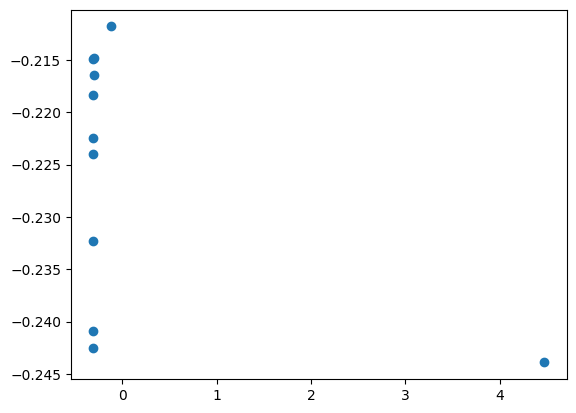

In [19]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test[:,0].detach().numpy(),y_preds.detach().numpy())

#plots test data
#plt.scatter(X_test[:,0].detach().numpy(),y_test.detach().numpy())

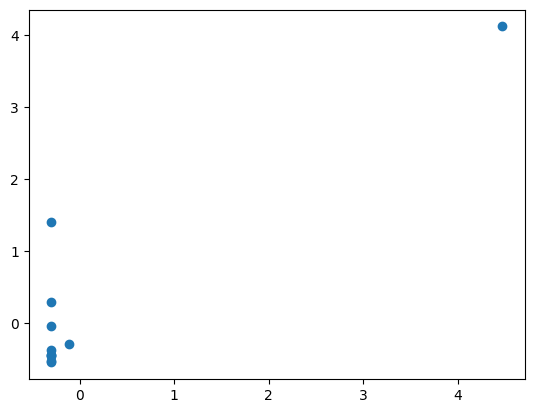

In [20]:
plt.scatter(X_test[:,0].detach().numpy(),y_test.detach().numpy())

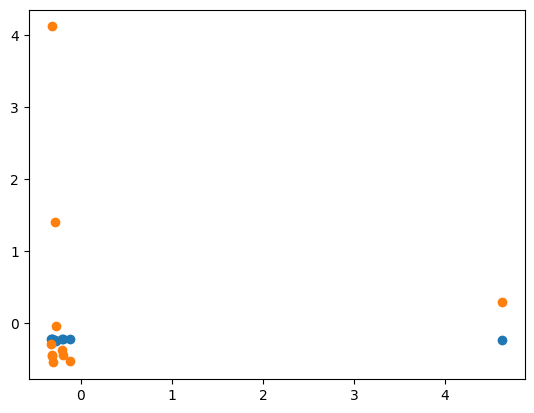

In [21]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test[:,4].detach().numpy(),y_preds.detach().numpy())

#plots test data
plt.scatter(X_test[:,4].detach().numpy(),y_test.detach().numpy())

You can really see how bad the models doing in the visual. The orange is the actual data, which is doing next to nothing. So, the blue, the predicted data, doesn't have aything to learn so it thinks its learning everything perfectly based on the lack of a test loss.

I'm gonna try using different data with a trend and see if that gets me anywhere.

# Attempt #2

For my second attempt, after I couldn't find a different data set to use, I decided to use the same data I used last unit but with a neural network.

In [2]:
energy = pd.read_csv("https://raw.githubusercontent.com/BiancaHill/Data-Science/refs/heads/main/Energy_Consumption3.csv").dropna()
energy

,Coal Consumed by the Residential Sector,Natural Gas Consumed by the Residential Sector (Excluding Supplemental Gaseous Fuels),Petroleum Consumed by the Residential Sector,Total Fossil Fuels Consumed by the Residential Sector,Geothermal Energy Consumed by the Residential Sector,Solar Energy Consumed by the Residential Sector,Biomass Energy Consumed by the Residential Sector,Total Renewable Energy Consumed by the Residential Sector,Total Primary Energy Consumed by the Residential Sector,Electricity Sales to Ultimate Customers in the Residential Sector,End-Use Energy Consumed by the Residential Sector,Electricity System Energy Losses Proportioned to the Residential Sector,Total Energy Consumed by the Residential Sector
192,3.141,770.700,193.835,967.676,0.425,2.794,78.137,81.356,1049.032,290.773,1339.806,586.876,1926.681
193,3.442,762.768,171.003,937.213,0.384,3.012,70.575,73.971,1011.184,267.131,1278.316,536.042,1814.358
194,2.542,662.882,169.116,834.540,0.425,4.150,78.137,82.712,917.252,263.909,1181.161,536.501,1717.662
195,2.536,425.431,121.988,549.956,0.411,4.574,75.616,80.602,630.557,221.127,851.684,431.130,1282.814
196,1.667,263.055,104.001,368.723,0.425,5.050,78.137,83.611,452.335,208.856,661.191,444.058,1105.249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.549,114.680,62.402,177.632,1.868,5.483,35.671,43.023,220.655,512.146,732.801,1067.734,1800.535
416,0.494,119.134,66.646,186.274,1.808,5.001,34.521,41.330,227.603,441.895,669.499,828.900,1498.398
417,0.671,178.341,84.760,263.772,1.868,4.558,35.671,42.098,305.870,354.008,659.878,687.303,1347.181
418,0.799,414.967,128.411,544.176,1.808,3.739,34.521,40.068,584.243,327.227,911.471,651.691,1563.161


I knew there were already trends in this data so the pairplot was more of a formality.

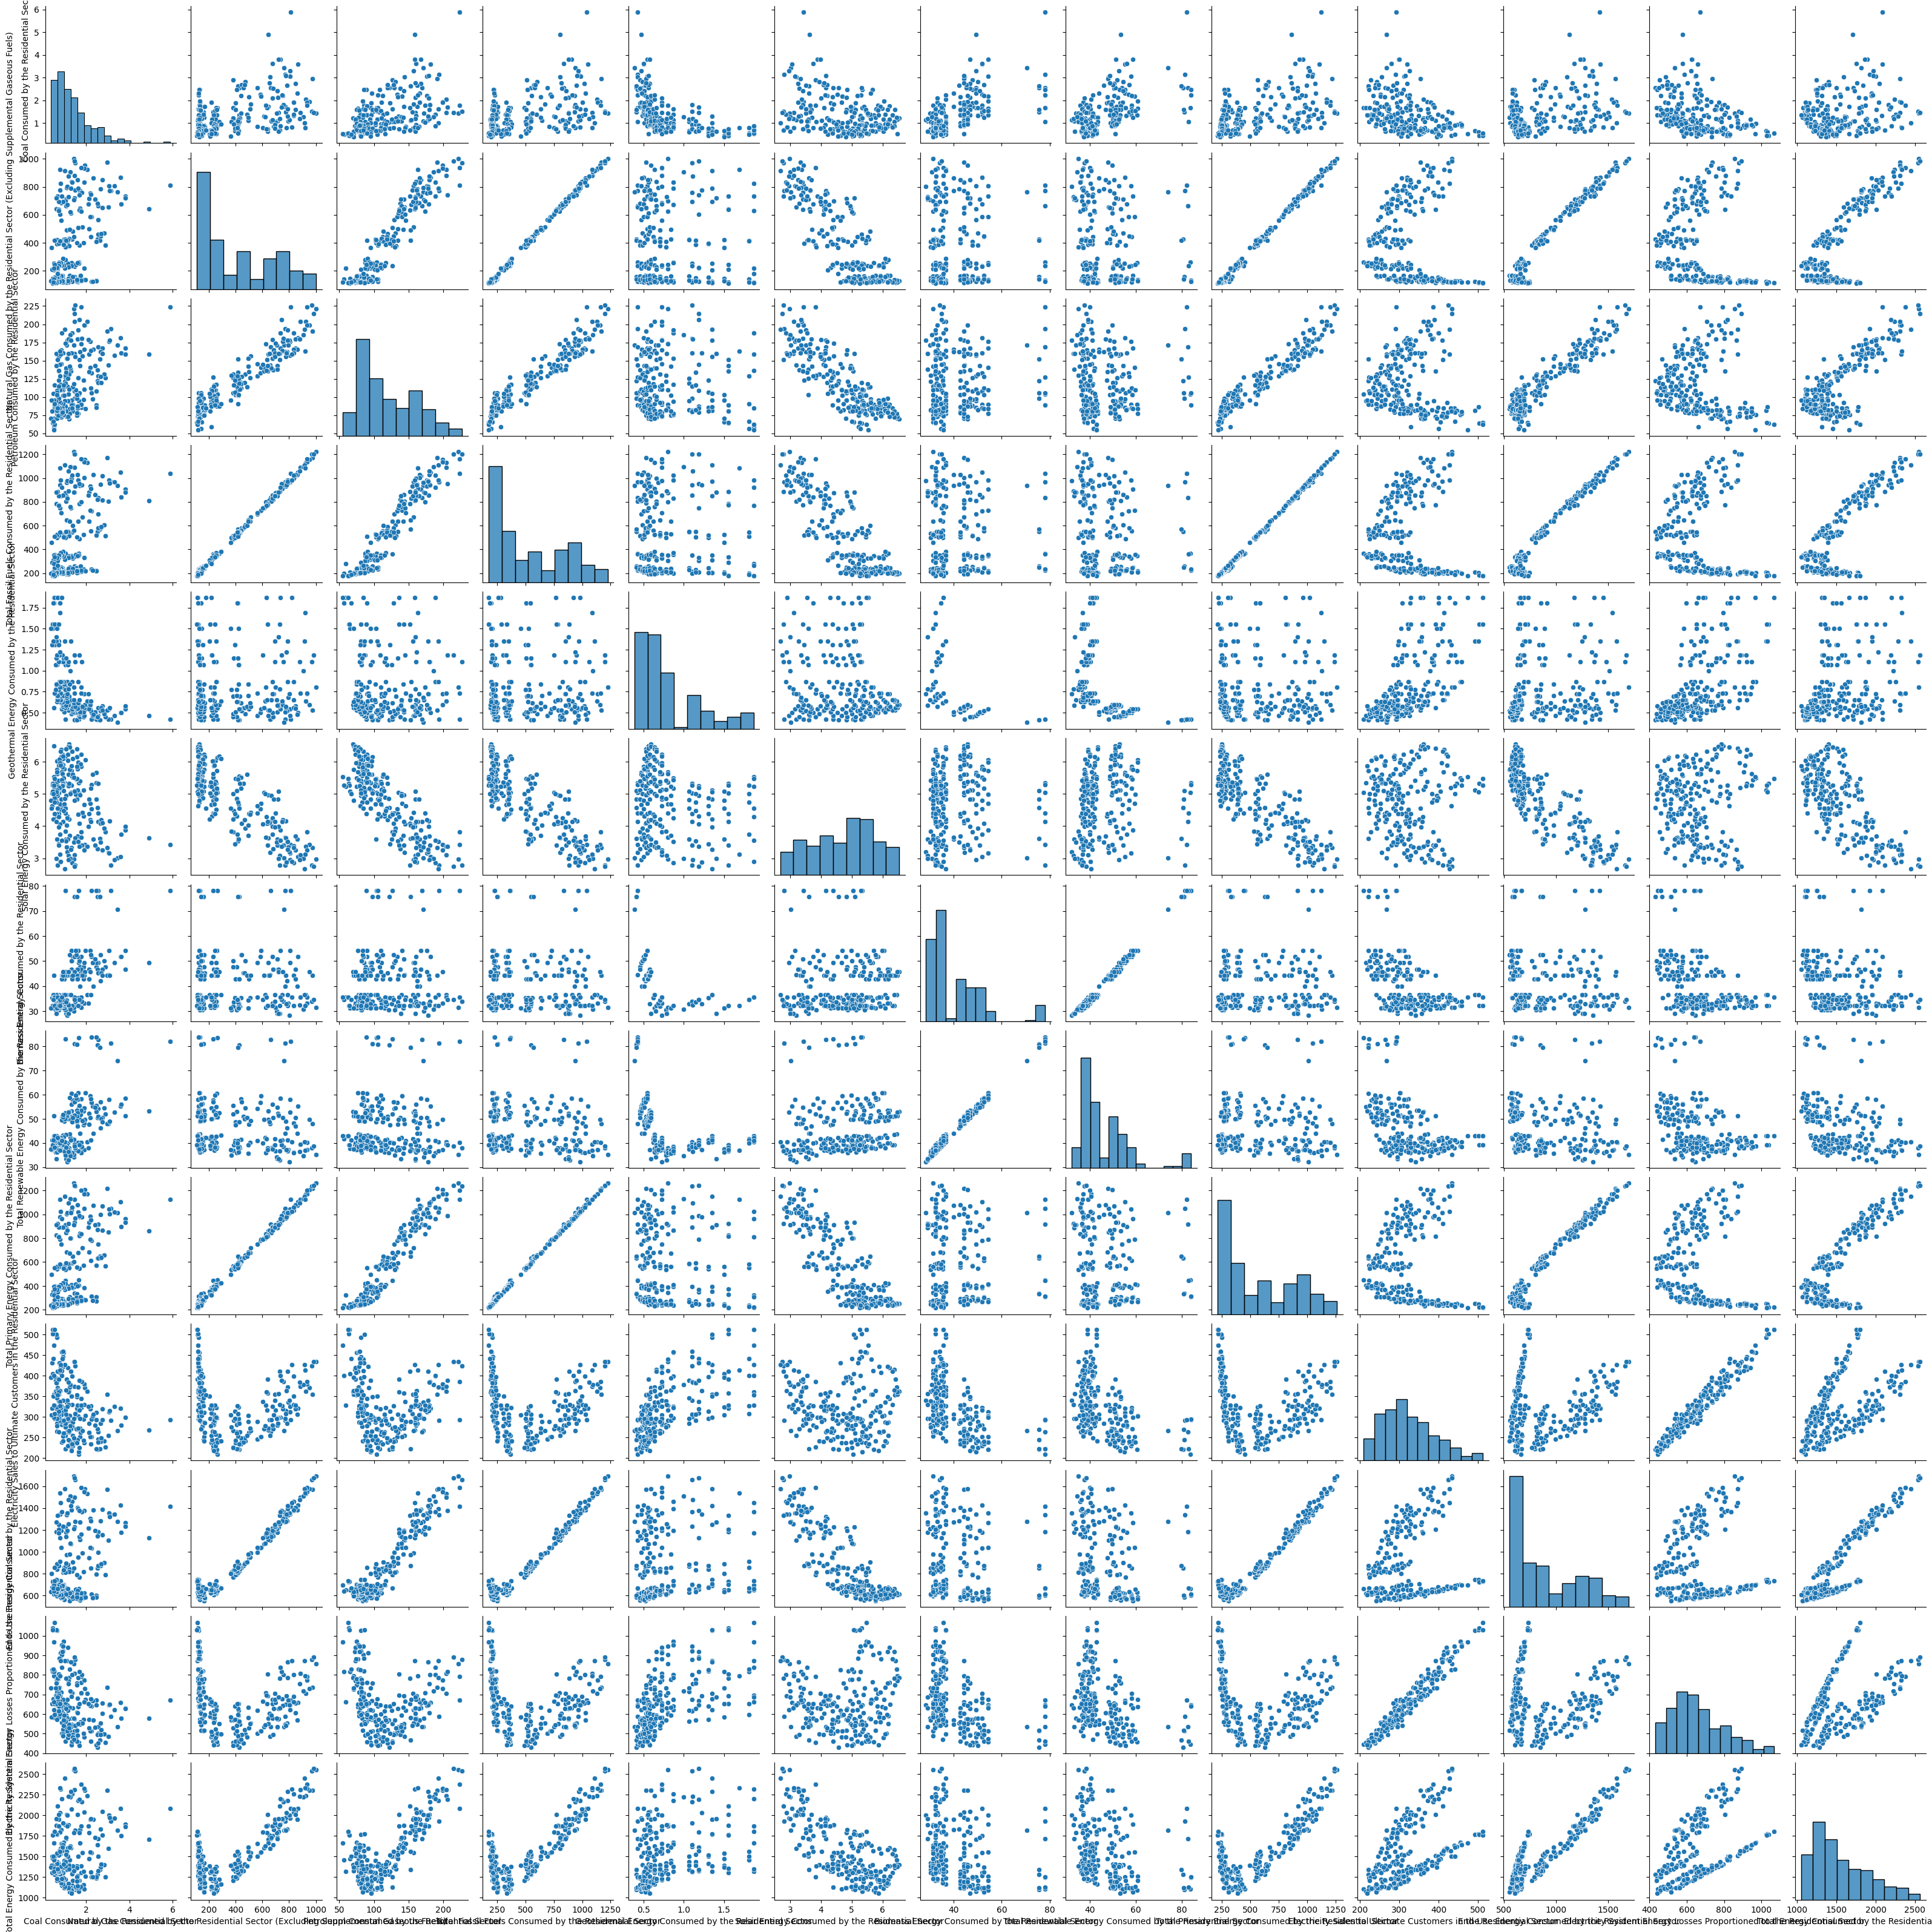

In [3]:
sns.pairplot(energy)

In [4]:
energy.rename(columns={'Coal Consumed by the Residential Sector':'Coal','Natural Gas Consumed by the Residential Sector (Excluding Supplemental Gaseous Fuels)':'Natural_Gas','Petroleum Consumed by the Residential Sector':'Petroleum','Total Fossil Fuels Consumed by the Residential Sector':'Fossil_Fuels','Geothermal Energy Consumed by the Residential Sector':'Geothermal','Solar Energy Consumed by the Residential Sector':'Solar','Biomass Energy Consumed by the Residential Sector':'Biomass','Total Renewable Energy Consumed by the Residential Sector':'Renewable','Total Primary Energy Consumed by the Residential Sector':'Primary','Electricity Sales to Ultimate Customers in the Residential Sector':'Electricity_Sales','End-Use Energy Consumed by the Residential Sector':'End_Use','Electricity System Energy Losses Proportioned to the Residential Sector':'Electricity_System_Losses','Total Energy Consumed by the Residential Sector':'Total_Energy'}, inplace=True)

In [5]:
energy.drop(columns=["Coal","Solar","Geothermal"],inplace=True)
energy.reset_index(drop=True,inplace=True)
energy

,Natural_Gas,Petroleum,Fossil_Fuels,Biomass,Renewable,Primary,Electricity_Sales,End_Use,Electricity_System_Losses,Total_Energy
0,770.700,193.835,967.676,78.137,81.356,1049.032,290.773,1339.806,586.876,1926.681
1,762.768,171.003,937.213,70.575,73.971,1011.184,267.131,1278.316,536.042,1814.358
2,662.882,169.116,834.540,78.137,82.712,917.252,263.909,1181.161,536.501,1717.662
3,425.431,121.988,549.956,75.616,80.602,630.557,221.127,851.684,431.130,1282.814
4,263.055,104.001,368.723,78.137,83.611,452.335,208.856,661.191,444.058,1105.249
...,...,...,...,...,...,...,...,...,...,...
223,114.680,62.402,177.632,35.671,43.023,220.655,512.146,732.801,1067.734,1800.535
224,119.134,66.646,186.274,34.521,41.330,227.603,441.895,669.499,828.900,1498.398
225,178.341,84.760,263.772,35.671,42.098,305.870,354.008,659.878,687.303,1347.181
226,414.967,128.411,544.176,34.521,40.068,584.243,327.227,911.471,651.691,1563.161


Scaling the data

In [6]:
elec = pd.DataFrame(energy)
scaler = StandardScaler()
scaled_values = scaler.fit_transform(elec)
elec_scaled = pd.DataFrame(scaled_values, columns=elec.columns)
elec_scaled

,Natural_Gas,Petroleum,Fossil_Fuels,Biomass,Renewable,Primary,Electricity_Sales,End_Use,Electricity_System_Losses,Total_Energy
0,1.322725,1.826891,1.399699,3.386658,3.212682,1.515739,-0.475828,1.400697,-0.501875,1.042614
1,1.293731,1.264835,1.302311,2.701743,2.536583,1.394434,-0.833828,1.205612,-0.862538,0.726748
2,0.928614,1.218383,0.974073,3.386658,3.336824,1.093374,-0.882617,0.897377,-0.859281,0.454827
3,0.060651,0.058232,0.064277,3.158323,3.143653,0.174494,-1.530445,-0.147928,-1.606878,-0.768017
4,-0.532888,-0.384554,-0.515112,3.386658,3.419128,-0.396722,-1.716259,-0.752289,-1.515156,-1.267351
...,...,...,...,...,...,...,...,...,...,...
223,-1.075248,-1.408597,-1.126017,-0.459626,-0.296715,-1.139275,2.876320,-0.525098,2.909766,0.687876
224,-1.058967,-1.304123,-1.098389,-0.563785,-0.451710,-1.117006,1.812542,-0.725931,1.215262,-0.161769
225,-0.842546,-0.858210,-0.850633,-0.459626,-0.381399,-0.866154,0.481710,-0.756455,0.210645,-0.587010
226,0.022402,0.216347,0.045799,-0.563785,-0.567246,0.026054,0.076178,0.041754,-0.042019,0.020352


Splitting the data into predictors and predicted.

In [7]:
energy1= elec_scaled[["Natural_Gas","Petroleum","Fossil_Fuels","Biomass","Renewable","Primary","Electricity_Sales","End_Use","Electricity_System_Losses"]]
energy1

,Natural_Gas,Petroleum,Fossil_Fuels,Biomass,Renewable,Primary,Electricity_Sales,End_Use,Electricity_System_Losses
0,1.322725,1.826891,1.399699,3.386658,3.212682,1.515739,-0.475828,1.400697,-0.501875
1,1.293731,1.264835,1.302311,2.701743,2.536583,1.394434,-0.833828,1.205612,-0.862538
2,0.928614,1.218383,0.974073,3.386658,3.336824,1.093374,-0.882617,0.897377,-0.859281
3,0.060651,0.058232,0.064277,3.158323,3.143653,0.174494,-1.530445,-0.147928,-1.606878
4,-0.532888,-0.384554,-0.515112,3.386658,3.419128,-0.396722,-1.716259,-0.752289,-1.515156
...,...,...,...,...,...,...,...,...,...
223,-1.075248,-1.408597,-1.126017,-0.459626,-0.296715,-1.139275,2.876320,-0.525098,2.909766
224,-1.058967,-1.304123,-1.098389,-0.563785,-0.451710,-1.117006,1.812542,-0.725931,1.215262
225,-0.842546,-0.858210,-0.850633,-0.459626,-0.381399,-0.866154,0.481710,-0.756455,0.210645
226,0.022402,0.216347,0.045799,-0.563785,-0.567246,0.026054,0.076178,0.041754,-0.042019


In [8]:
energy2= elec_scaled[["Total_Energy"]]
energy2

,Total_Energy
0,1.042614
1,0.726748
2,0.454827
3,-0.768017
4,-1.267351
...,...
223,0.687876
224,-0.161769
225,-0.587010
226,0.020352


Converting to tensors

In [9]:
#convert to numpy array
E_matrix = energy1.to_numpy()
#convert to a PyTorch tensor
E_tensor = torch.from_numpy(E_matrix)

In [10]:
#convert to numpy array
E2_matrix = energy2.to_numpy()
#convert to a PyTorch tensor
E2_tensor = torch.from_numpy(E2_matrix)

Defining my variables

In [11]:
X = E_tensor #use all columns as predictor
y = E2_tensor#.unsqueeze(dim=1) #Predicting Total

# 80% of data is training, 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Next, I tried many many combinations of the structure of my model set up to see which one would work the best. I don't include all the attempts since that would be way too much code to look through, but I tried changing the type of function, how many layers, how many nodes, etc. Here I'm showing with linear and relu, only linear, and linear and tanh.

## W/ ReLu

In [87]:
# Two layer nn with nn.Sequential
model_3 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=9, out_features=32,),
    nn.ReLU(),

    #hidden layer with 32 nodes
   nn.Linear(in_features=32, out_features=24, ),
   #nn.RReLU(),

    #moves to hidden layer with 24 nodes
   nn.Linear(in_features=24, out_features=16, ),
    nn.RReLU(),

    #hidden layer with 16 nodes
   nn.Linear(in_features=16, out_features=1, ),
    #nn.RReLU(),
)

Forcing model_3 to be a float.64 for the optimizer

In [88]:
model_3=model_3.double()

In [89]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [90]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_3.train()

    # 1. Forward pass; makes predictions
    y_pred = model_3(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_3.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_3(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 1.05862, Test loss: 0.98696
Epoch: 200 | Train loss: 1.01686, Test loss: 0.95337
Epoch: 400 | Train loss: 0.97817, Test loss: 0.92059
Epoch: 600 | Train loss: 0.93507, Test loss: 0.88801
Epoch: 800 | Train loss: 0.89496, Test loss: 0.85562
Epoch: 1000 | Train loss: 0.85411, Test loss: 0.82299
Epoch: 1200 | Train loss: 0.81368, Test loss: 0.78999
Epoch: 1400 | Train loss: 0.77134, Test loss: 0.75633
Epoch: 1600 | Train loss: 0.73259, Test loss: 0.72188
Epoch: 1800 | Train loss: 0.68712, Test loss: 0.68682


In [91]:
# Turn on evaluation mode
model_3.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_3(X_test)

This is the prediction data

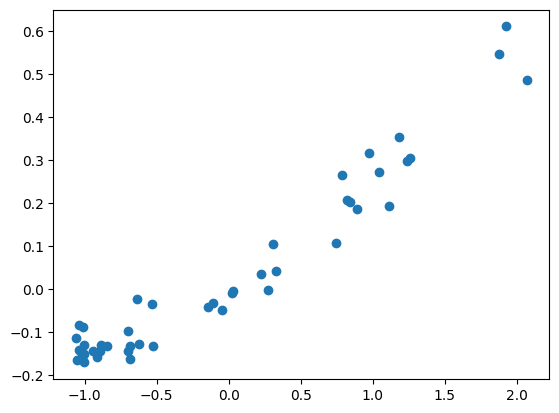

In [92]:
plt.scatter(X_test[:,0].detach().numpy(),y_preds)

It's not bad, it's trying to match the original data shown below and it's doing an ok job at that. It doesn't quite go as far as it's supposed to but that might have been because of the scaling or because the model's bad. Overall, sometimes the model does better than others, which means sometimes the model is finder a deeper local minimum which is closer to the absolute minimum but isn't exactly what it's supposed to be. I would need to keep tweeking the architecture and learning rate to try to get a better model but I already tried that for like 2 hours.

This model has a nice mean line but kind of blobs up at the beginning and gets a little scarse at the end. This would probably be meh at predicting, but based on comparing the test/training loss and the visualization, I would find a better model before predicting anything.

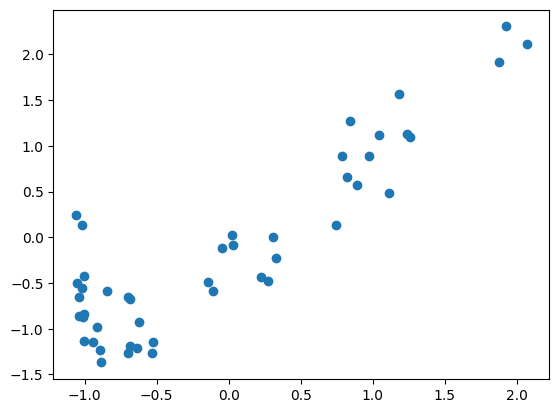

In [93]:
#plots test data
plt.scatter(X_test[:,0].detach().numpy(),y_test)

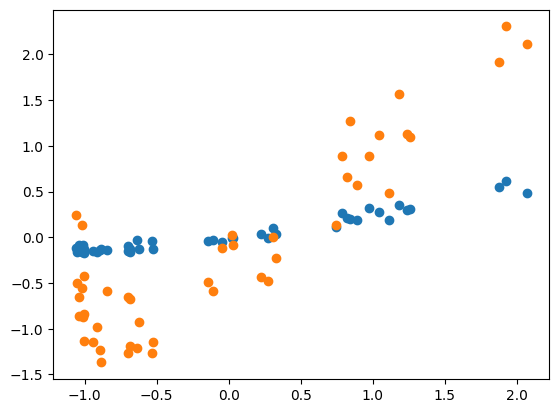

In [94]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test[:,0].detach().numpy(),y_preds)

#plots test data
plt.scatter(X_test[:,0].detach().numpy(),y_test)

I can't model them together, it just doesn't work. I think it's because of how I scaled the data earlier, but I'm just looking at the visualizations seperately instead of together.

## Only Linear

In [95]:
# Two layer nn with nn.Sequential
model_4 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=9, out_features=32,),
    #nn.ReLU(),

    #hidden layer with 32 nodes
   nn.Linear(in_features=32, out_features=24, ),
   #nn.RReLU(),

    #moves to hidden layer with 24 nodes
   nn.Linear(in_features=24, out_features=16, ),
   # nn.RReLU(),

    #hidden layer with 16 nodes
   nn.Linear(in_features=16, out_features=1, ),
    #nn.RReLU(),

    #hidden layer with 4 nodes
   #nn.Linear(in_features=8, out_features=1, ),
    #outputs a vector of predicted weights
)

Forcing it to be a fload.64 dtype

In [96]:
model_4=model_4.double()

In [97]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [98]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_4.train()

    # 1. Forward pass; makes predictions
    y_pred = model_4(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_4.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_4(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 1.24707, Test loss: 1.18675
Epoch: 200 | Train loss: 1.10443, Test loss: 1.04951
Epoch: 400 | Train loss: 0.98407, Test loss: 0.93324
Epoch: 600 | Train loss: 0.87522, Test loss: 0.82768
Epoch: 800 | Train loss: 0.77199, Test loss: 0.72728
Epoch: 1000 | Train loss: 0.67153, Test loss: 0.62938
Epoch: 1200 | Train loss: 0.57315, Test loss: 0.53345
Epoch: 1400 | Train loss: 0.47790, Test loss: 0.44066
Epoch: 1600 | Train loss: 0.38806, Test loss: 0.35337
Epoch: 1800 | Train loss: 0.30653, Test loss: 0.27454


Nice training loss and test loss compared to the other models

In [99]:
# Turn on evaluation mode
model_4.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_4(X_test)

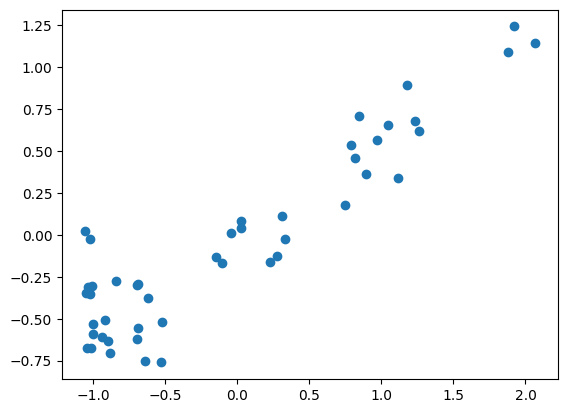

In [100]:
plt.scatter(X_test[:,0].detach().numpy(),y_preds)

This model looks pretty good, which makes sense since it's only linear, but this is a good representation of what a good model is supposed to look like.

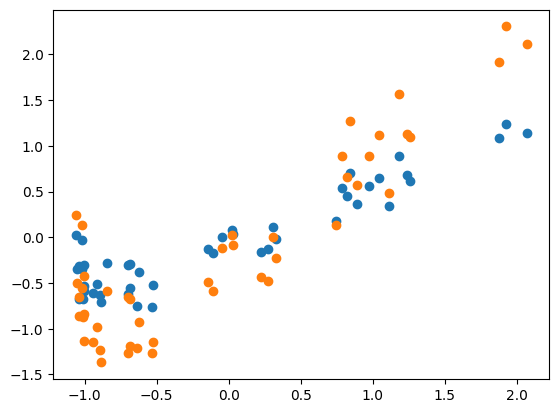

In [101]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test[:,0].detach().numpy(),y_preds)

#plots test data
plt.scatter(X_test[:,0].detach().numpy(),y_test)

For some reason the scaling isn't as much of a problem for this model??? it's not perfect but isn't much better than the relu model. Maybe isn't the relu that's messing it up and making it unable to scale it back to what it should be.

Theoretically, this one would be the best at predicting, but since it's only linear, it's not quite the model type that I want to use, which is a non linear model.

## W/ Tanh

In [102]:
# Two layer nn with nn.Sequential
model_5 = nn.Sequential(
    #our input is a vector, so 1 diminsion.
    nn.Linear(in_features=9, out_features=32,),
    nn.Tanh(),

    #hidden layer with 32 nodes
   nn.Linear(in_features=32, out_features=24, ),
   nn.Tanh(),

    #moves to hidden layer with 24 nodes
   nn.Linear(in_features=24, out_features=16, ),
    nn.Tanh(),

    #hidden layer with 16 nodes
   nn.Linear(in_features=16, out_features=1, ),
    #nn.Tanh(),
)

Force it to be a float.64

In [103]:
model_5=model_5.double()

In [104]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [105]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_5.train()

    # 1. Forward pass; makes predictions
    y_pred = model_5(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_5.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_5(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 0.99993, Test loss: 0.97297
Epoch: 200 | Train loss: 0.95176, Test loss: 0.92666
Epoch: 400 | Train loss: 0.90561, Test loss: 0.88220
Epoch: 600 | Train loss: 0.86088, Test loss: 0.83897
Epoch: 800 | Train loss: 0.81710, Test loss: 0.79649
Epoch: 1000 | Train loss: 0.77397, Test loss: 0.75444
Epoch: 1200 | Train loss: 0.73127, Test loss: 0.71262
Epoch: 1400 | Train loss: 0.68891, Test loss: 0.67093
Epoch: 1600 | Train loss: 0.64689, Test loss: 0.62936
Epoch: 1800 | Train loss: 0.60530, Test loss: 0.58803


Training loss and test loss are ok

In [106]:
# Turn on evaluation mode
model_5.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_5(X_test)

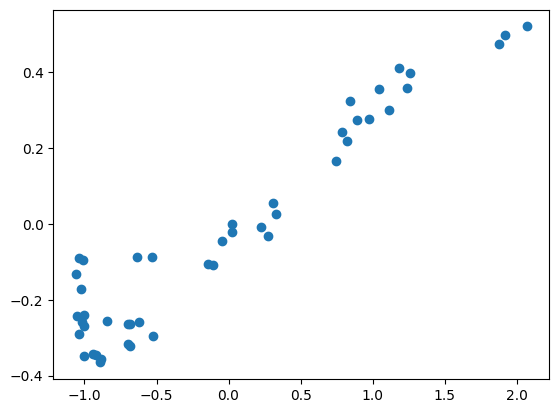

In [107]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test[:,0].detach().numpy(),y_preds)

This model is doing really good and the end, but getting a little confused near the beginning. Before -0.5, the prediction is really just one big blob that's vagually in the right shape. This could mean that the tanh function better fits my model or works better with the architecture of my data.

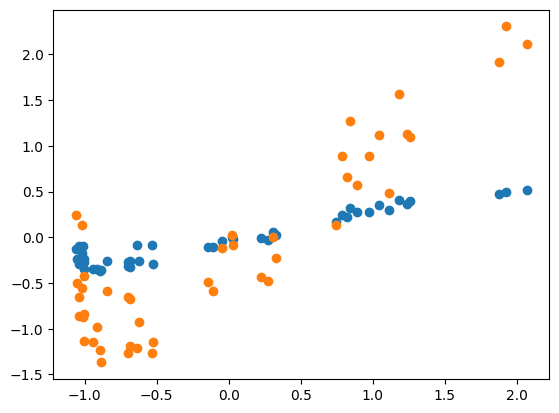

In [108]:
#plots predictions--remember, our model has never seen X_test
plt.scatter(X_test[:,0].detach().numpy(),y_preds)

#plots test data
plt.scatter(X_test[:,0].detach().numpy(),y_test)

This one is kind of in the middle of the other two models in terms of graphing them together. It's more of a mean line which is what we want, but it's still a little bit too flat for what I want. I still have absolutely no idea why it's graphing this why or why the scale isn't working.

This one is about in the middle of the other models in terms of predicting because it only gets weird at the beginning. But it's also hard to tell since I can't see them accurately graphed on top of each other. Does this model mean that the predicted data is just scaled weirdly and if I fixed the scale it would be really good, or is the predict?ion just bad?